### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
car=pd.read_csv("/home/rgukt/Downloads/car data (1).csv")
car=pd.DataFrame(car)


In [3]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [5]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### DATA PREPROCESSING

In [10]:
car.columns = car.columns.str.lower()
car.isnull().sum()

car_name         0
year             0
selling_price    0
present_price    0
driven_kms       0
fuel_type        0
selling_type     0
transmission     0
owner            0
dtype: int64

In [11]:
car.dropna(inplace=True)

In [12]:
car.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'driven_kms',
       'fuel_type', 'selling_type', 'transmission', 'owner'],
      dtype='object')

In [13]:
X = car.drop(columns=['selling_price'])
y = car['selling_price']


In [14]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']


In [15]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' 
)



In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### TRAINING THE DATA

In [18]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train

,car_name,year,present_price,driven_kms,fuel_type,selling_type,transmission,owner
184,Bajaj Pulsar 150,2008,0.750,26000,Petrol,Individual,Manual,1
132,Bajaj Avenger 220,2017,0.950,3500,Petrol,Individual,Manual,0
194,Hero CBZ Xtreme,2008,0.787,50000,Petrol,Individual,Manual,0
75,etios g,2015,6.800,36000,Petrol,Dealer,Manual,0
111,Royal Enfield Thunder 350,2016,1.500,8700,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...
188,Hero Glamour,2013,0.570,18000,Petrol,Individual,Manual,0
71,corolla altis,2011,12.480,45000,Diesel,Dealer,Manual,0
106,Hyosung GT250R,2014,3.450,16500,Petrol,Individual,Manual,1
270,city,2011,10.000,69341,Petrol,Dealer,Manual,0


In [21]:
X_test

,car_name,year,present_price,driven_kms,fuel_type,selling_type,transmission,owner
177,Honda Activa 125,2016,0.57,24000,Petrol,Individual,Automatic,0
289,city,2016,13.60,10980,Petrol,Dealer,Manual,0
228,verna,2012,9.40,60000,Diesel,Dealer,Manual,0
198,Bajaj Discover 125,2011,0.57,35000,Petrol,Individual,Manual,1
60,corolla altis,2013,18.61,40001,Petrol,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
234,grand i10,2015,5.70,4492,Petrol,Dealer,Manual,0
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0
281,city,2006,7.60,50456,Petrol,Dealer,Manual,0
285,jazz,2016,8.50,15059,Petrol,Dealer,Automatic,0


In [22]:
y_train

184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: selling_price, Length: 240, dtype: float64

In [23]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: selling_price, Length: 61, dtype: float64

In [24]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['car_name', 'fuel_type',
                                                   'selling_type',
                                                   'transmission'])])),
                ('regressor', LinearRegression())])

In [25]:
y_pred = model.predict(X_test)


In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


In [27]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 1.0620115556259315
Mean Squared Error: 2.6768388517181942
Root Mean Squared Error: 1.6361047801770503
R^2 Score: 0.8837954882646726


### DATA VISUALIZATION

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

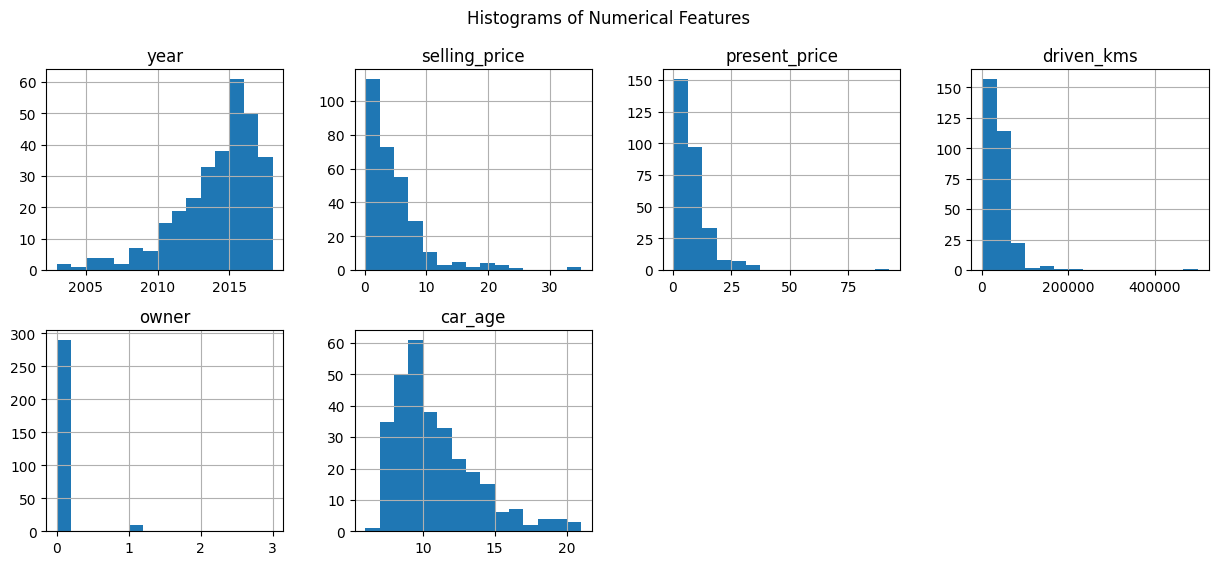

In [39]:
numeric_columns = car.select_dtypes(include=[np.number]).columns
car[numeric_columns].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()


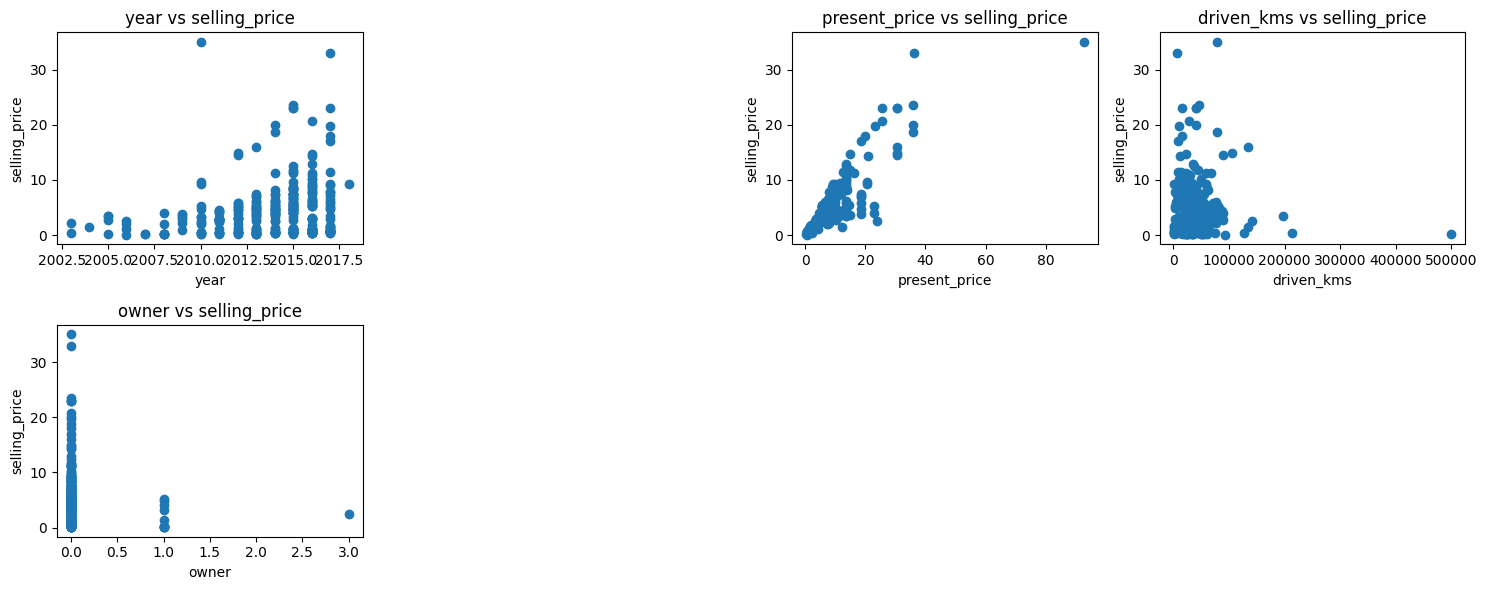

In [30]:
target_column = 'selling_price' 
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_columns, 1):
    if col != target_column:
        plt.subplot(2, 4, i)
        plt.scatter(car[col], car[target_column])
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.title(f'{col} vs {target_column}')
plt.tight_layout()
plt.show()


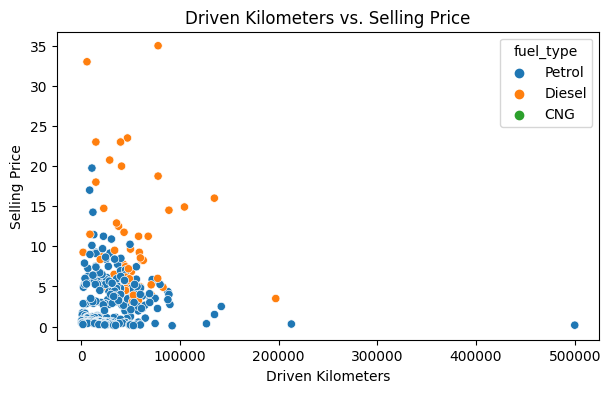

In [41]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='driven_kms', y='selling_price', data=car, hue='fuel_type')
plt.title('Driven Kilometers vs. Selling Price')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.show()

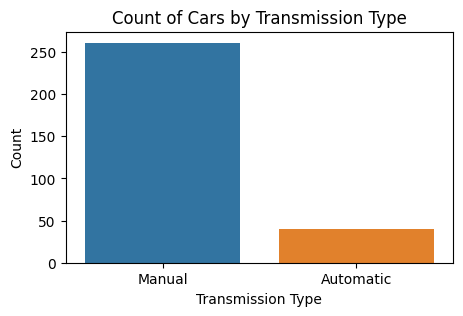

In [42]:
plt.figure(figsize=(5, 3))
sns.countplot(x='transmission', data=car)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

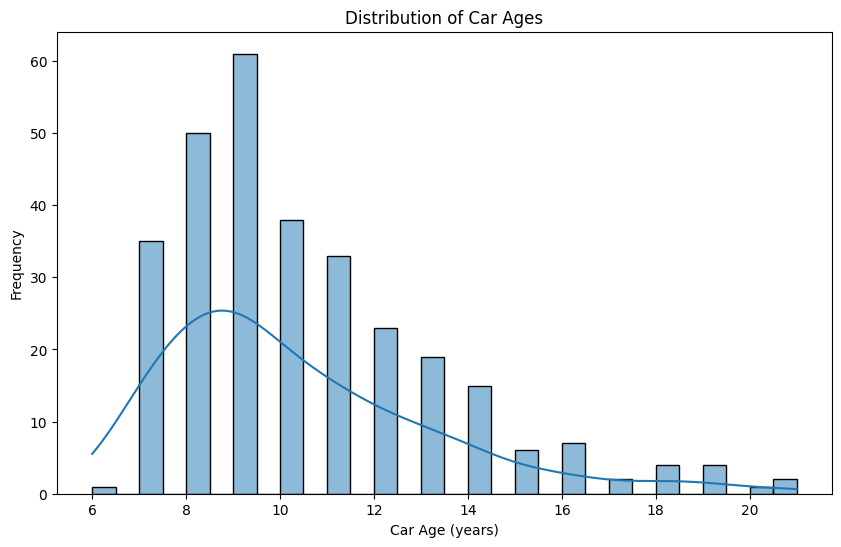

In [43]:
car['car_age'] = 2024 - car['year']
plt.figure(figsize=(10, 6))
sns.histplot(car['car_age'], kde=True, bins=30)
plt.title('Distribution of Car Ages')
plt.xlabel('Car Age (years)')
plt.ylabel('Frequency')
plt.show()


In [44]:
def create_pie_chart(data, column, title):
    counts = data[column].value_counts()
    
    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
    plt.title(title)
    plt.axis('equal') 
    plt.show()


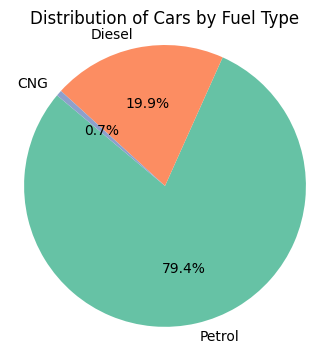

In [45]:
create_pie_chart(car, 'fuel_type', 'Distribution of Cars by Fuel Type')

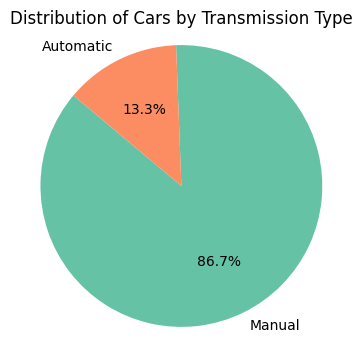

In [46]:
create_pie_chart(car, 'transmission', 'Distribution of Cars by Transmission Type')


In [47]:
numeric_columns = car.select_dtypes(include=['float64', 'int64'])


In [48]:
corr_matrix = numeric_columns.corr()


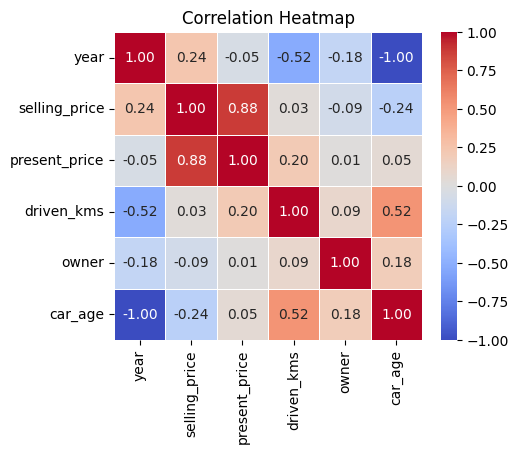

In [115]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



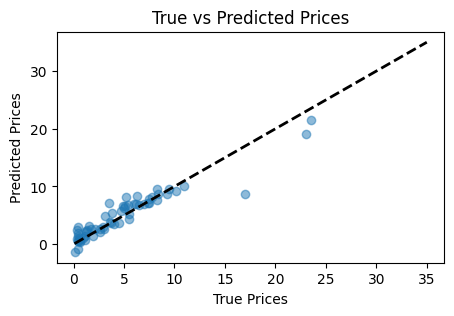

In [50]:
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()